In [2]:
from wmf import wmf 
import numpy as np
import pylab as pl
import pandas as pd
import pickle
import datetime
from datetime import timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')
import scipy as scp
import os
import aforos as af
from IPython.display import IFrame
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xlsxwriter
import codecs
from multiprocessing import Pool
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.patches as patche
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
def aforo(codigo,DEM='dem_amva60',DIR='dir_amva60',aforo=1):
    '''runs aforos module
    Parameters
    ----------
    codigo: id in dbase
    salida: campain folder name
    DEM : dem name
    DIR : dir name
    aforo : flow measurement number or id
    -------
    Returns
        ------
        out: self
        sets module aforos up 
        '''
    self = af.aforos(codigo,aforo=int(aforo),
                    nombre = df_informacion.loc[codigo,'FolderName'])
    self.ruta_dem = '/media/nicolas/Home/nicolas/01_SIATA/raster/%s.tif'%DEM
    self.ruta_dir = '/media/nicolas/Home/nicolas/01_SIATA/raster/%s.tif'%DIR
    self.longitud = float(df_informacion.loc[codigo,'Longitud'])
    self.latitud = float(df_informacion.loc[codigo,'Latitud'])
    self.name = df_informacion.loc[codigo,'Nombre']
    self.municipio = df_informacion.loc[codigo,'Municipio']
    self.direccion = df_informacion.loc[codigo,'Direccion']
    self.barrio = df_informacion.loc[codigo,'Barrio']
    self.subcuenca = df_informacion.loc[codigo,'Subcuenca']
    return self

def runbyid(dfe_id):
    self = aforo(int(dfe.loc[dfe_id,'id_estacion_asociada']),aforo=dfe.loc[dfe_id,'aforo'])
    self.fecha = pd.to_datetime(dfe.loc[dfe_id,'fecha'])
    self.date = self.fecha.strftime('%Y-%m-%d %H:%M')
    return self

In [4]:
hora_inicial = '06:00'
hora_final = '18:00'
df_informacion = pd.read_csv('../information/info_redrio.csv',index_col=0)
#dfe = pd.read_csv('../information/salidas_21y22_junio.csv',index_col=0)
texto = ['% ----------------------------------------------',
         '% ---------------------TEXTO AQUÍ---------------',
         '% ----------------------------------------------']
#estaciones = pd.read_csv('/media/nicolas/Home/Jupyter/Aforos/informacion/estaciones.csv',index_col=0)
#nombres = pd.read_csv('/media/nicolas/Home/Jupyter/Aforos/informacion/nombres.csv',index_col=0)

In [5]:
fecha = pd.to_datetime('2017-03-09')
dfe = pd.read_csv('../information/20170309_dfe.csv',index_col=0)
nombre_salida = u'Campaña 09 de Marzo'

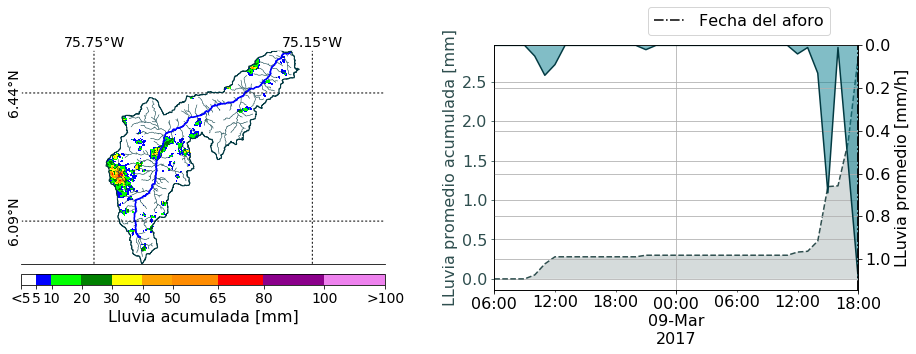

In [6]:
self = aforo(1061)
self.fecha = fecha+datetime.timedelta(hours=18)
#self.get_rain()
self.simubasin(rute=True,show=False)
rain = self.plot_lluvia_aforo(ax2color='darkslategrey',
                  fecha=self.fecha.strftime('%Y-%m-%d')+' 18:00',
                  ruta='%s/%s_rain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),
                  formato='png')

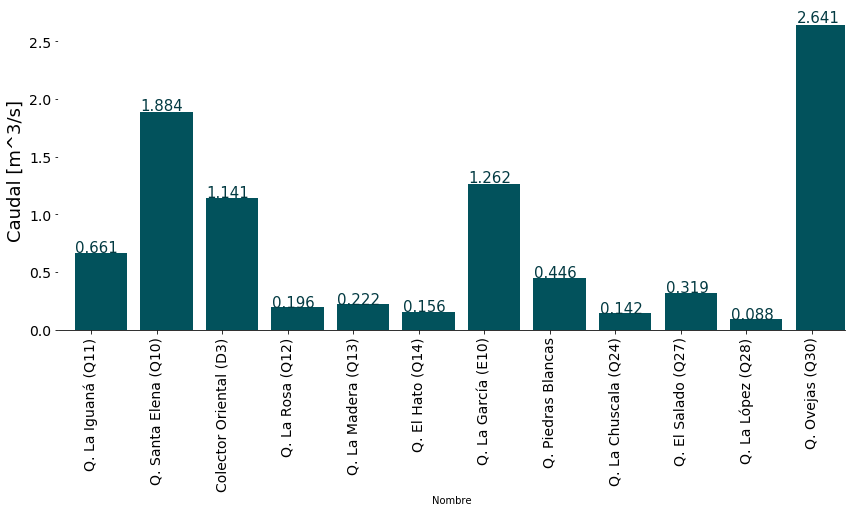

In [59]:
resumen = df_informacion.loc[dfe['id_estacion_asociada'].values].set_index('Nombre')
resumen['caudal_medio']= dfe['caudal_medio'].values
resumen = resumen.reset_index().drop(2)
resumen.loc[3,'caudal_medio']= 0.767612+0.373506
resumen = resumen.set_index('Nombre')
self.plot_resumen_flow(resumen['caudal_medio'],'%s/%s_flux.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')))

Colombia
Antioquia


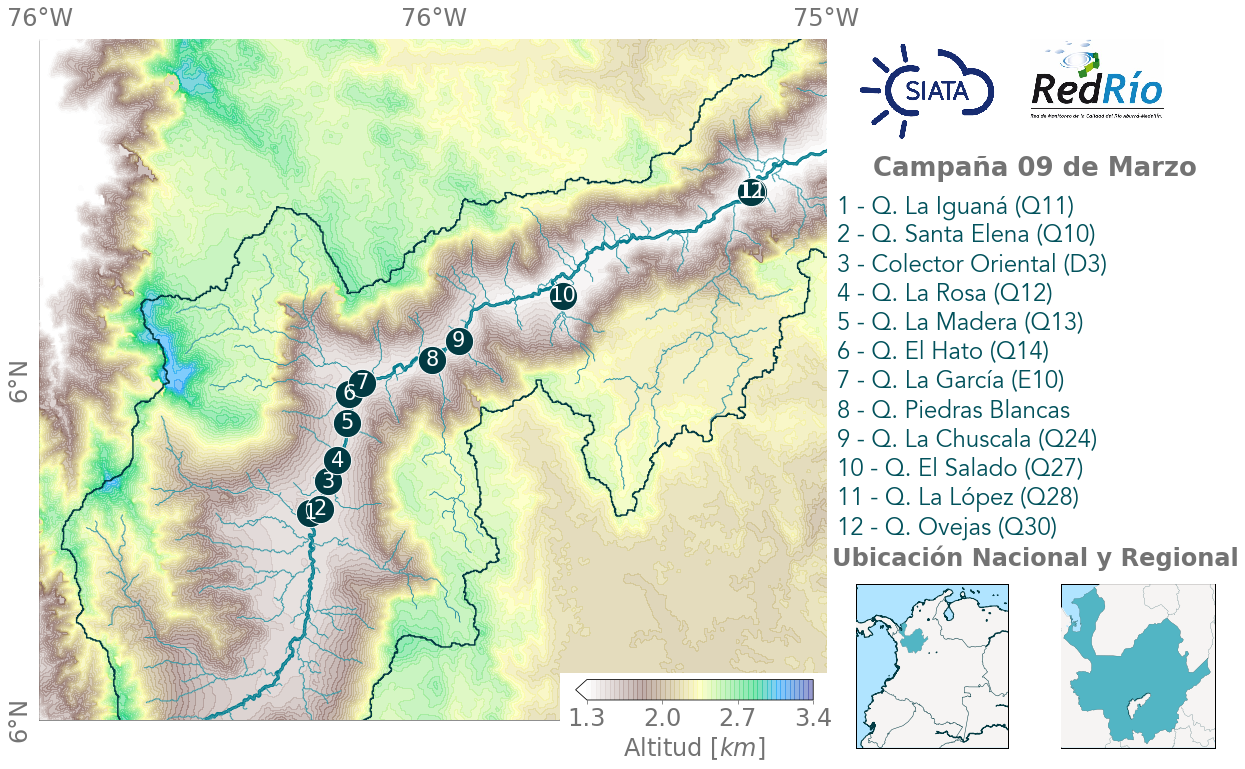

In [60]:
point = df_informacion.loc[dfe.drop(2)['id_estacion_asociada'].values].sort_values(by='Latitud')
self.Plot_Mapa2(add_scatter=[point['Longitud'].values,point['Latitud'].values],\
                title =nombre_salida,Logo='SIATA2.png',\
                Drainage='/media/nicolas/maso/Mario/shapes/nets/Puente_Gabino_1061/Puente_Gabino_1061',\
                add_stations=map(lambda x:x.decode('utf-8'),point['Nombre'].values),\
                georef=[6.52,6.15,-75.725,(-75.725+0.43)],clim=[1300,3400],fontsize=24,\
                Basin='/media/nicolas/maso/Mario/shapes/basins/Puente_Gabino_1061/Puente_Gabino_1061',
                decimales=33)

self.m.readshapefile('/media/nicolas/maso/Mario/shapes/streams/169/169','drenaje',
                     color=self.colores_siata[-3],
                     linewidth=3.0,zorder=5)
plt.savefig('%s/%s_map_campain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),format='png',bbox_inches='tight')


# Tabla resultados

In [9]:
nombre_salida = 'Campaña 09 de Marzo'
caption = 'Parámetros hidráulicos %s'%nombre_salida
columns = ['Caudal medio','Velocidad media','Área','Perímetro','Altura media','Rádio hidráulico']
cellwidth = [30]+6*[70/6]
df_latex = dfe[['caudal_medio','velocidad_media','area_total','perimetro','altura_media','radio_hidraulico']]
df_latex.index = df_informacion.loc[dfe['id_estacion_asociada'].values]['Nombre'].values
tabla=self.latex_table_from_df(df_latex,caption,'tab:%s'%fecha.strftime('%Y%m%d'),columns,cellwidth,width=5.6)

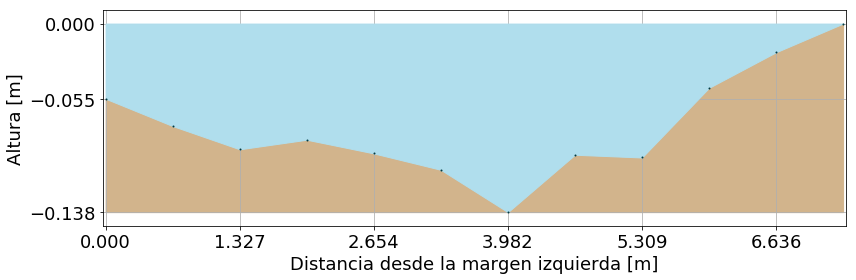

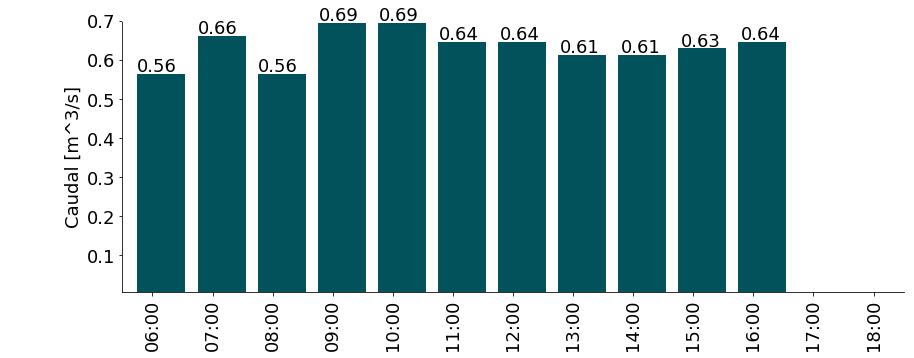

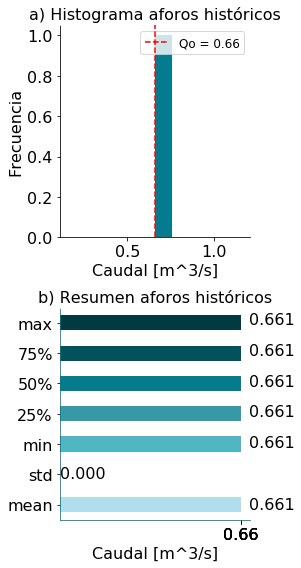

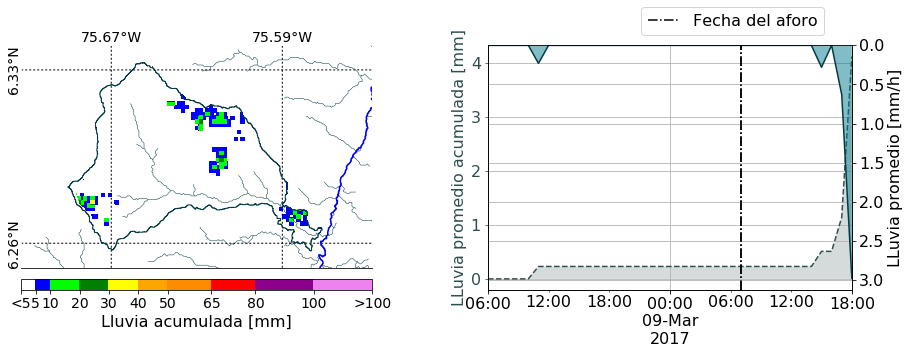

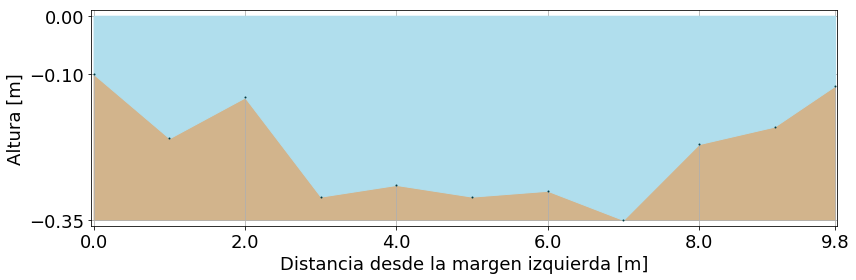

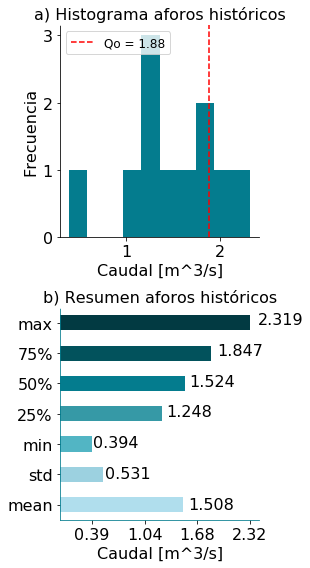

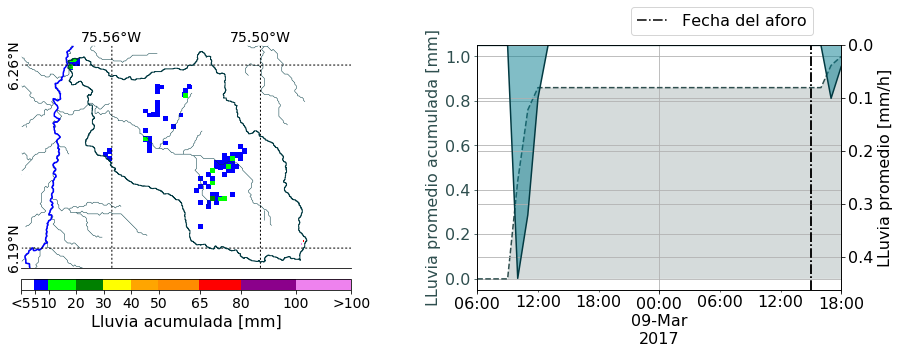

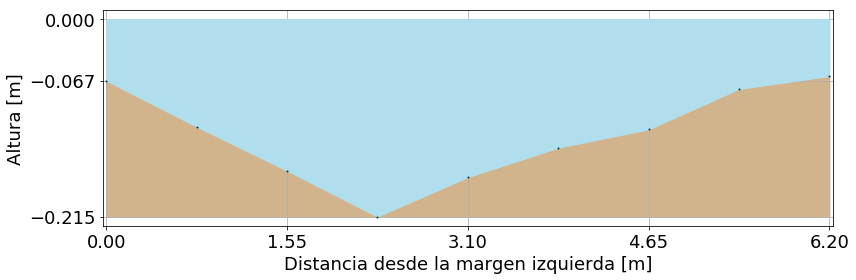

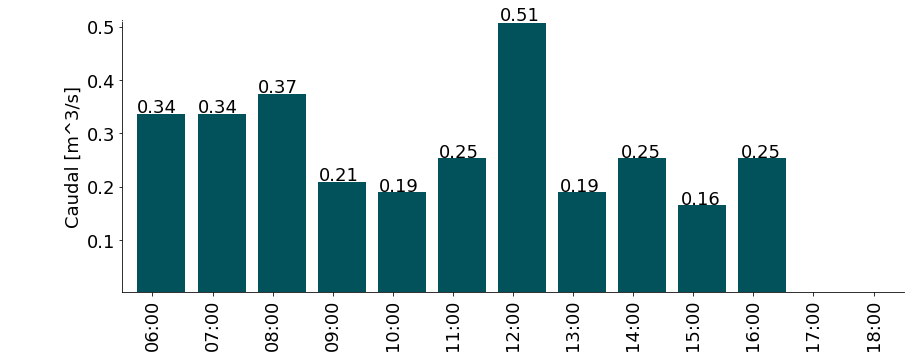

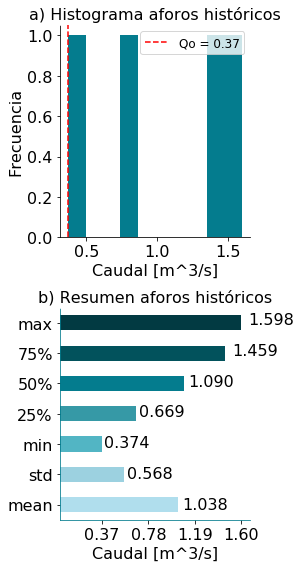

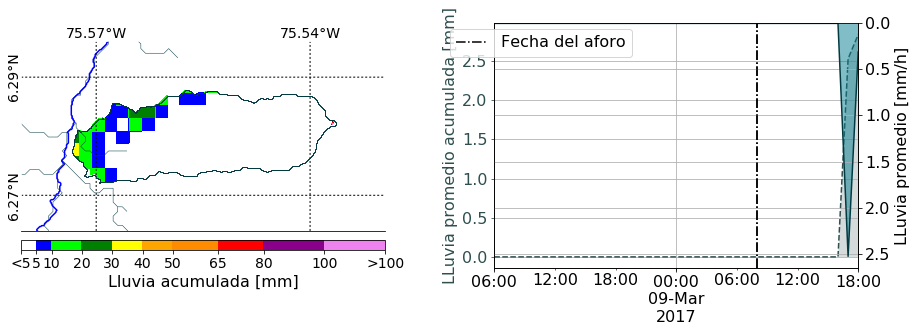

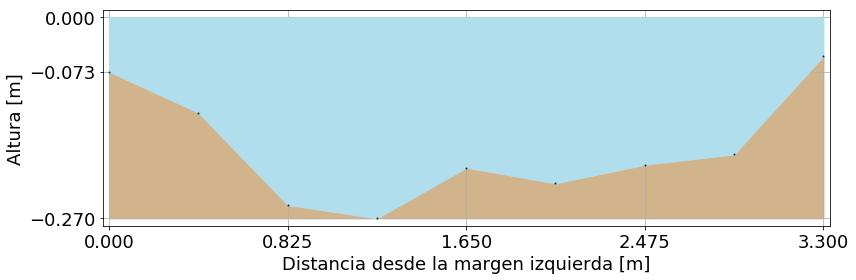

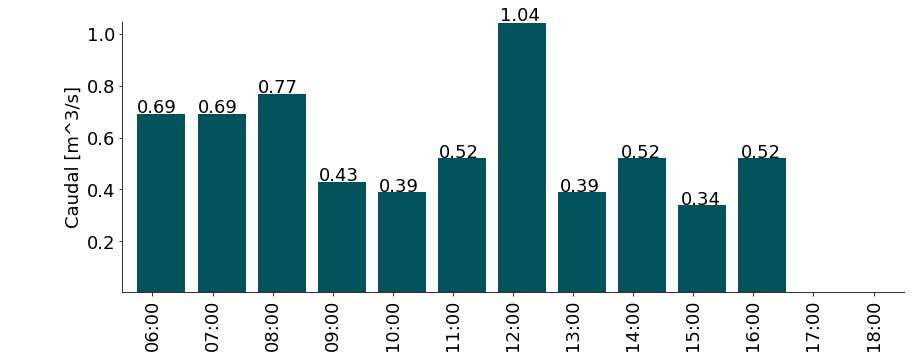

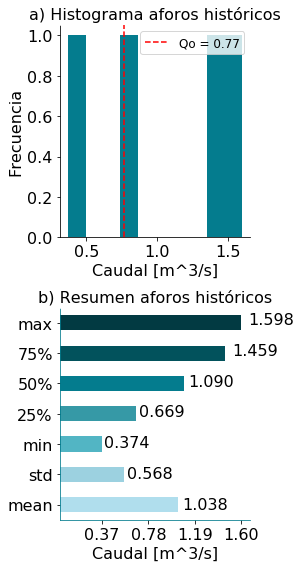

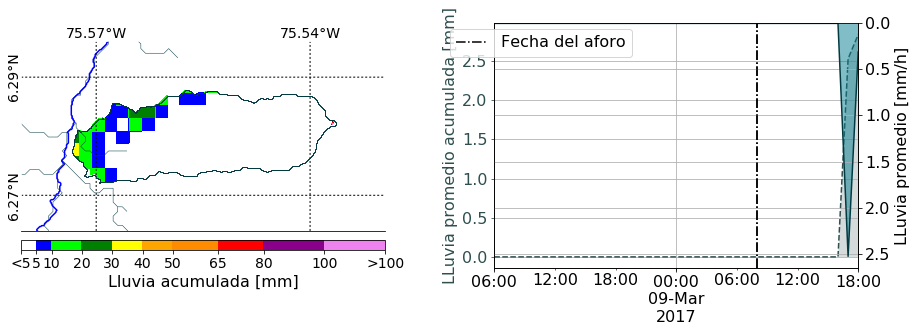

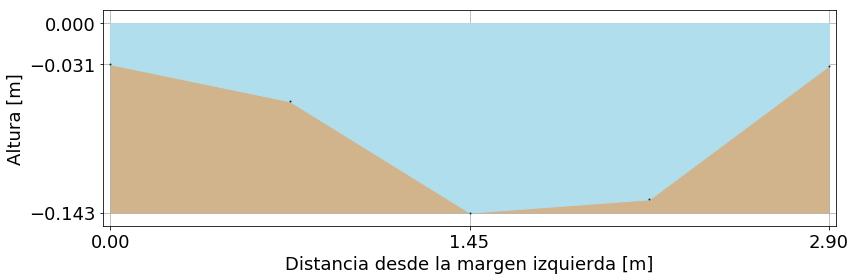

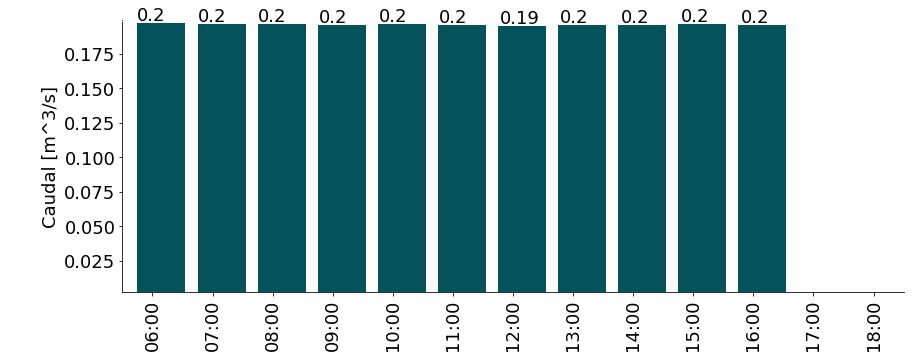

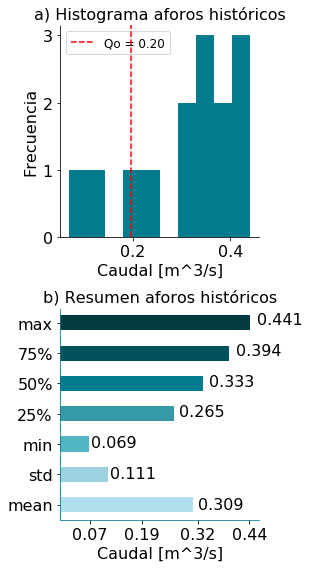

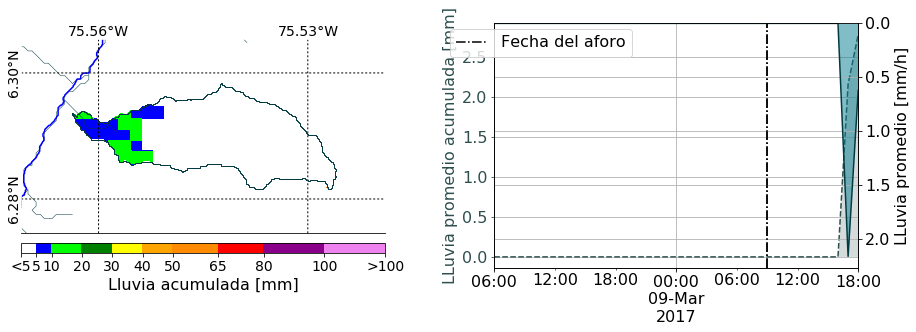

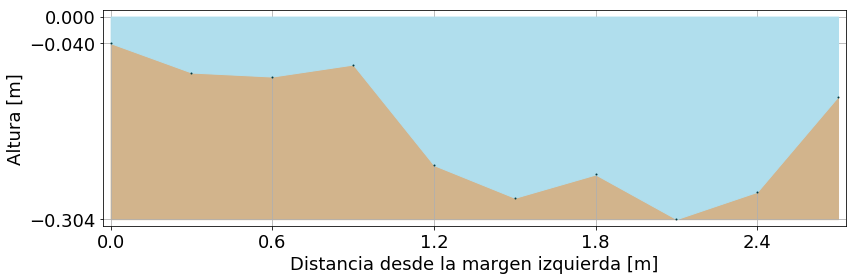

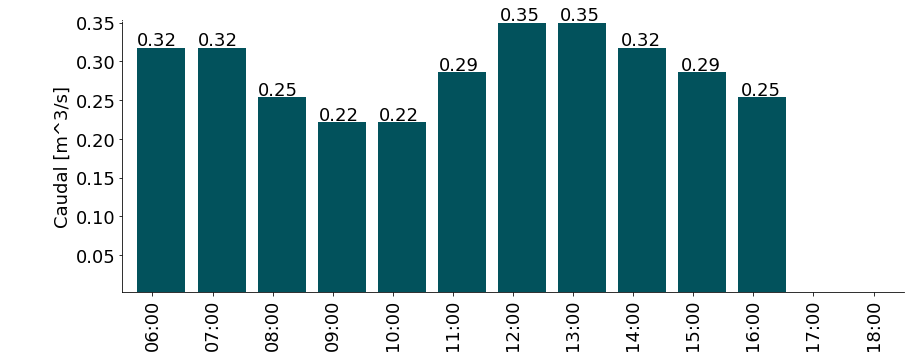

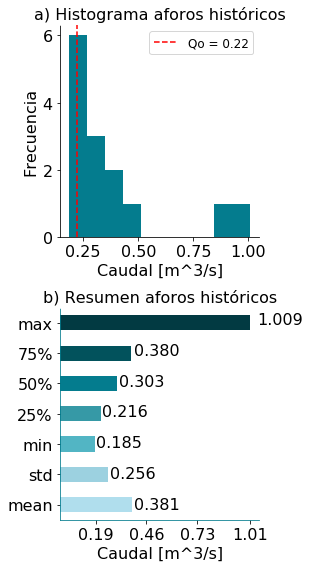

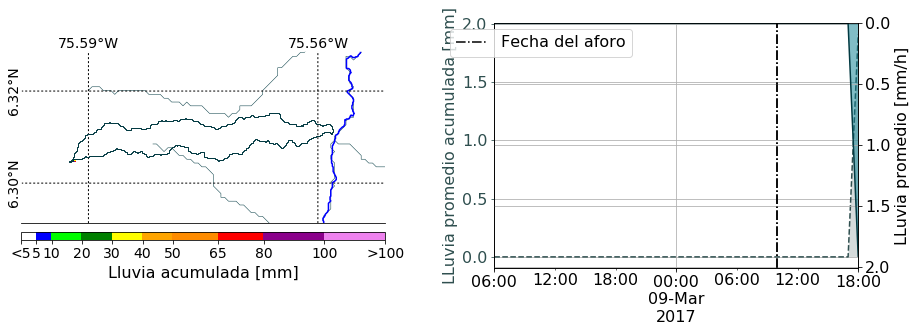

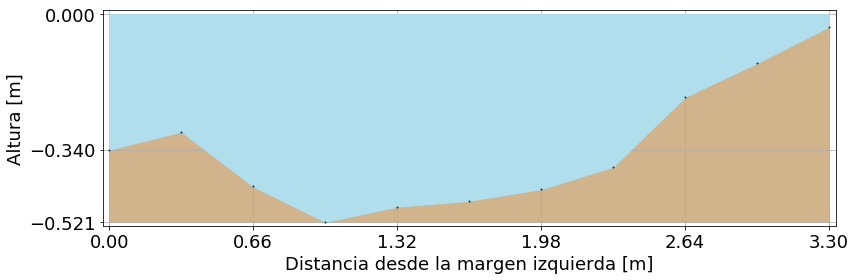

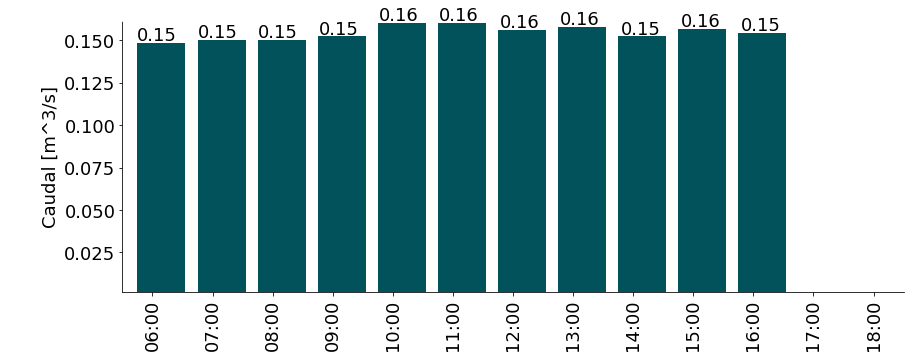

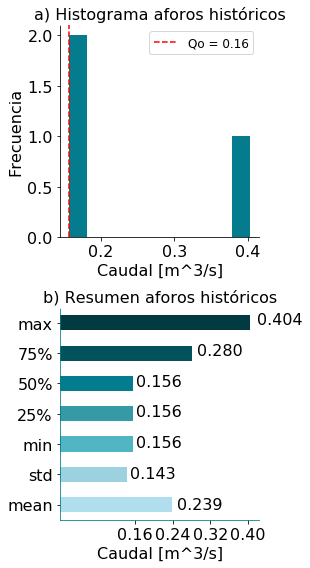

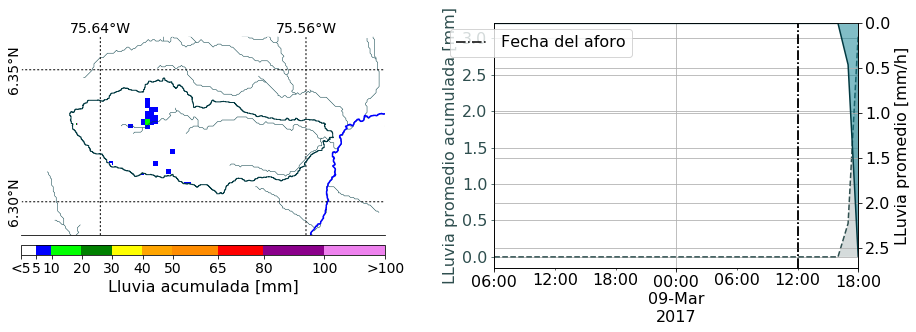

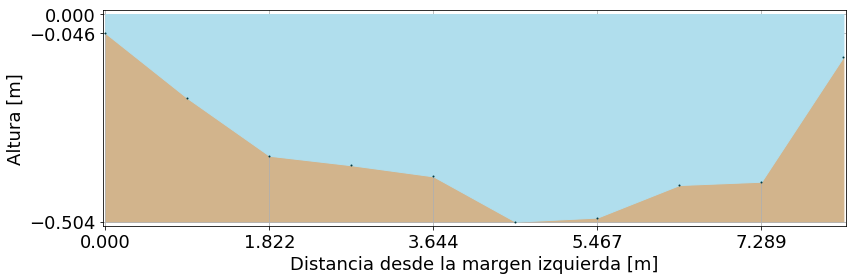

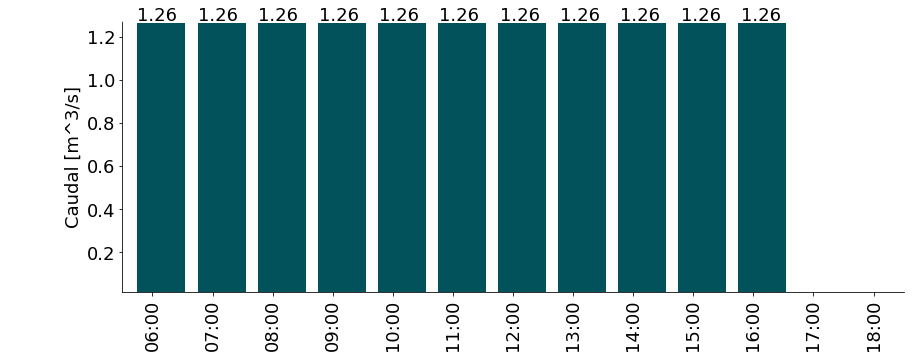

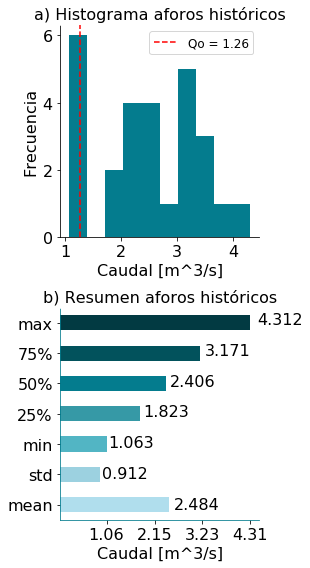

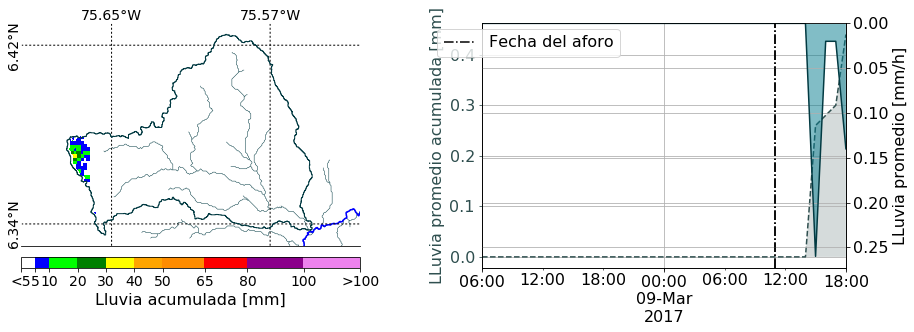

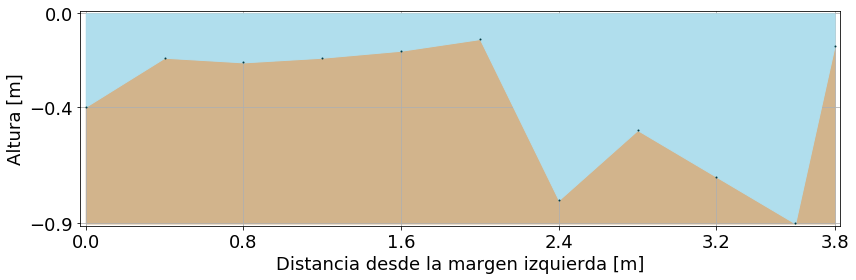

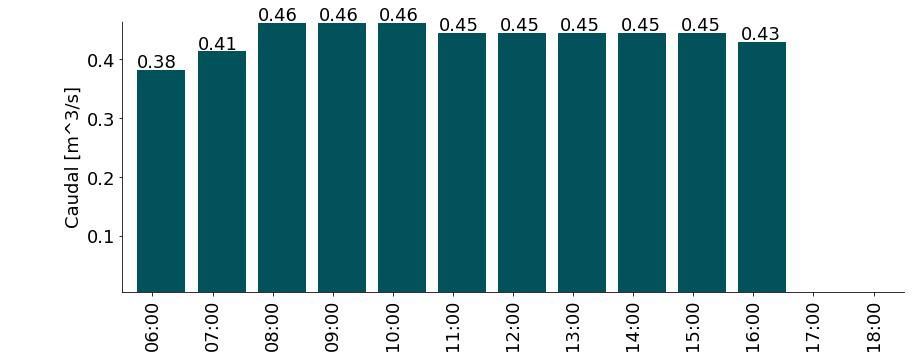

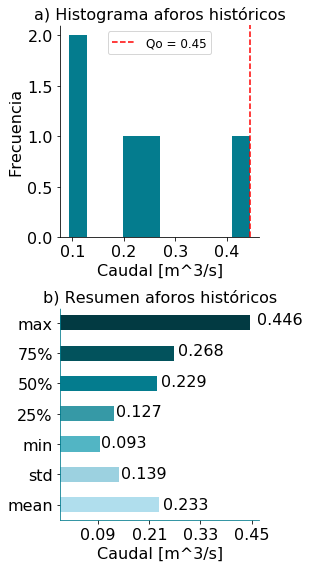

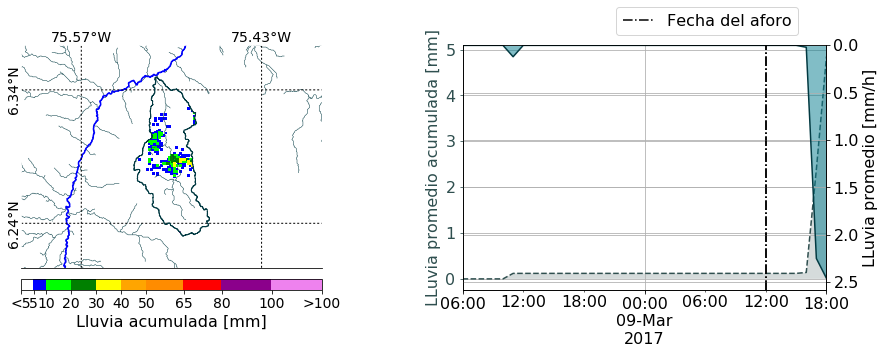

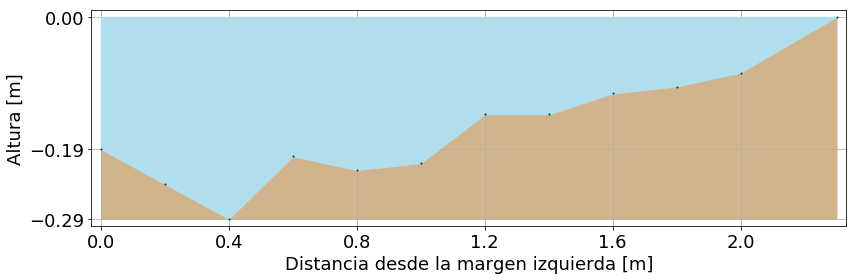

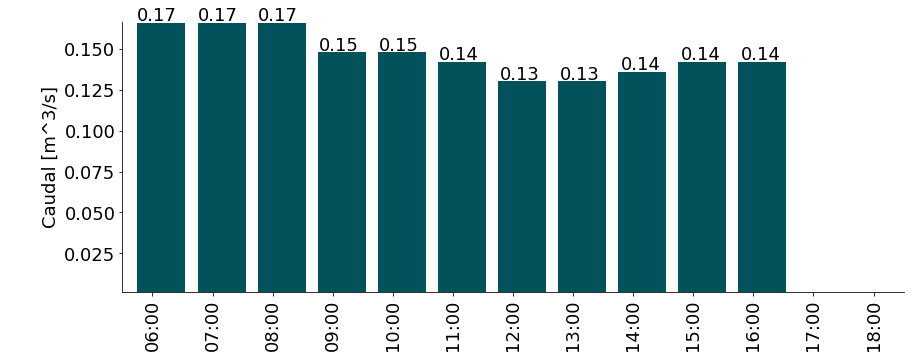

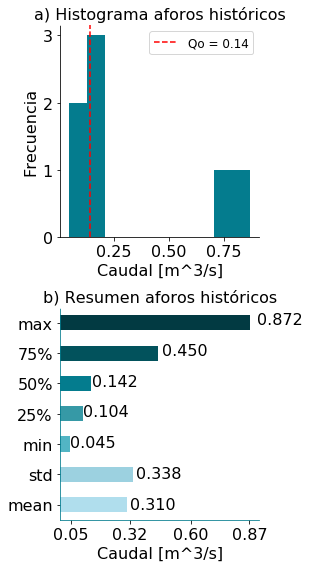

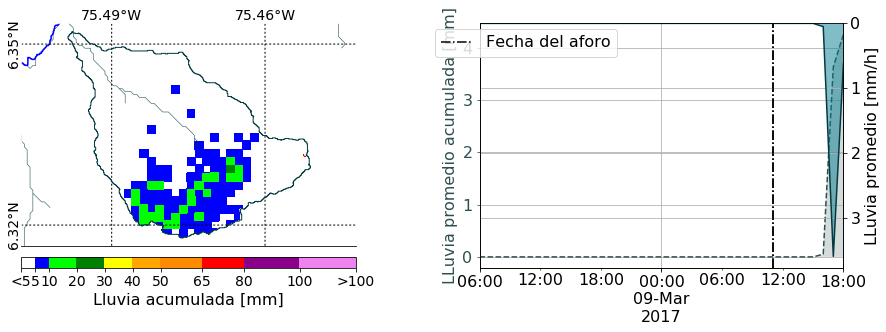

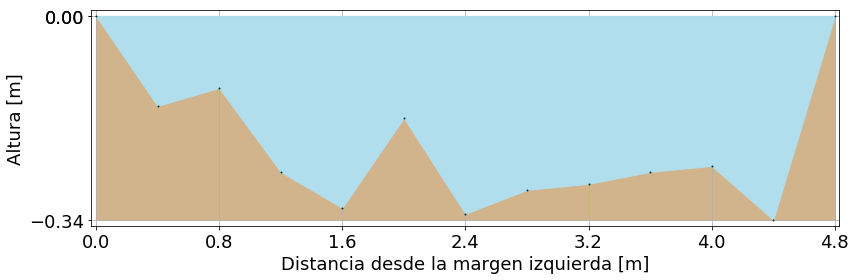

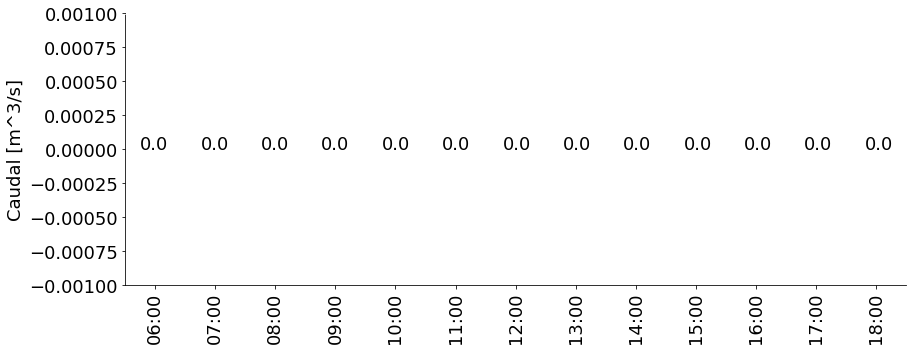

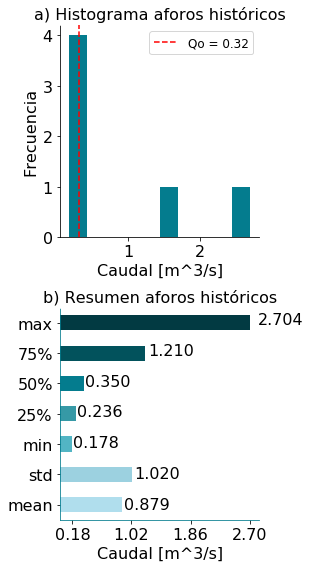

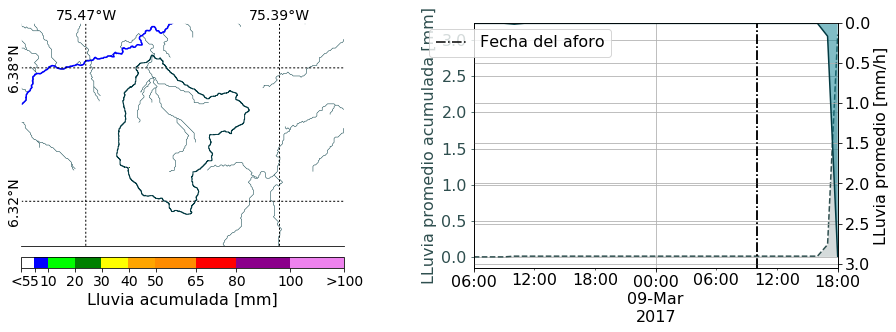

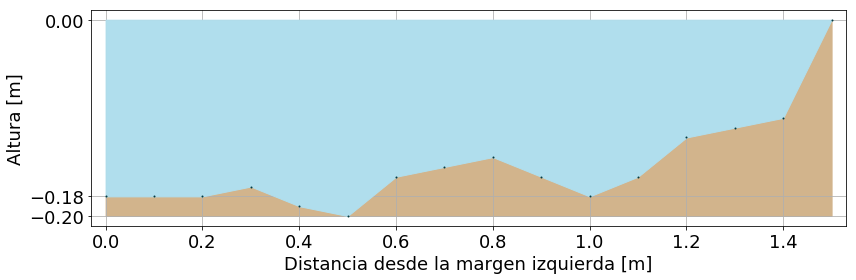

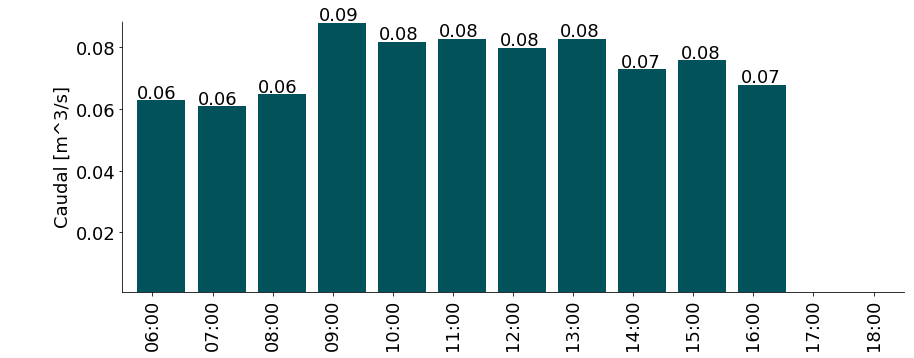

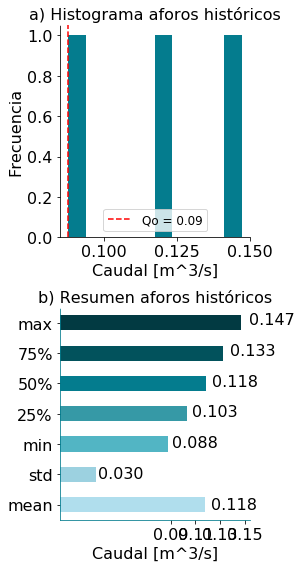

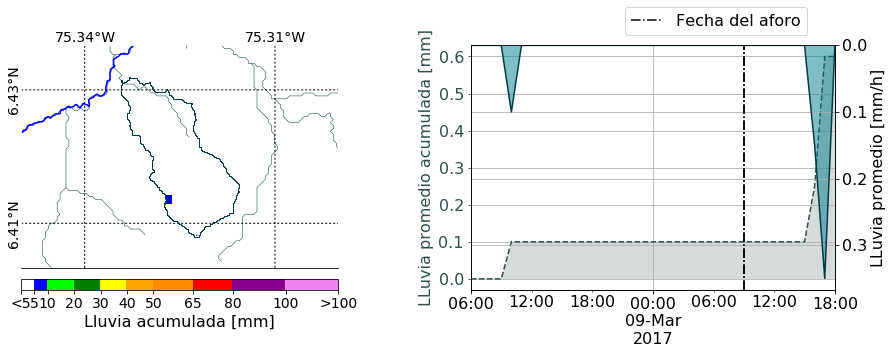

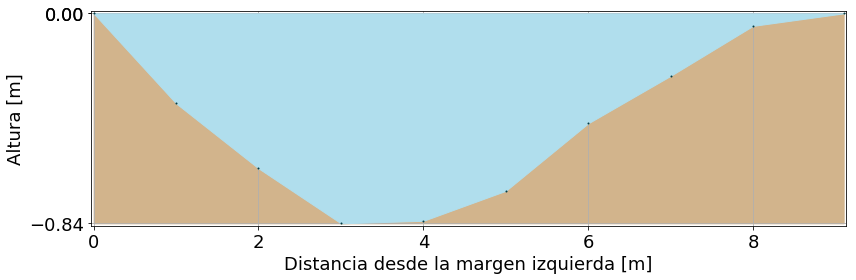

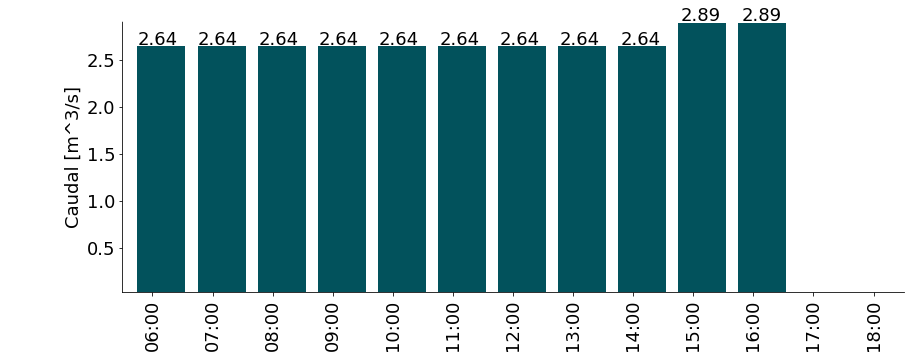

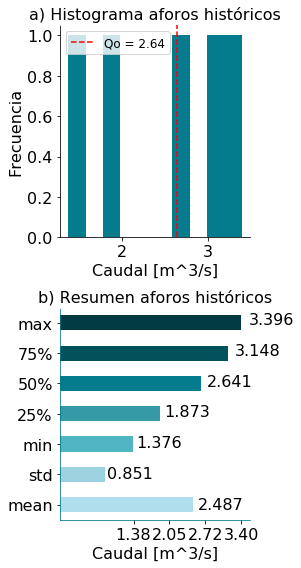

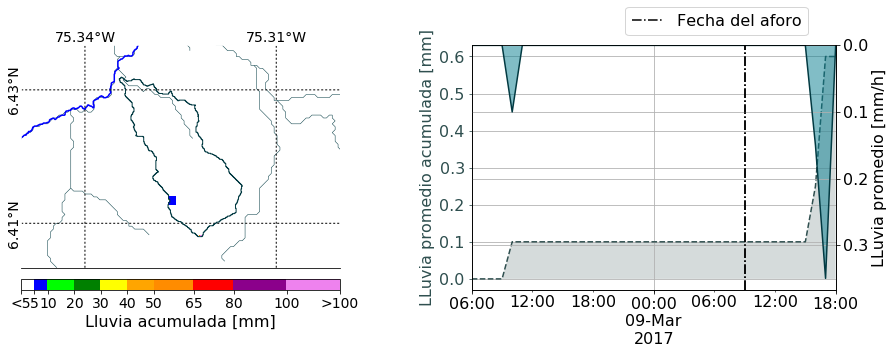

In [10]:
def latex_hidrologia(self,caudal,ruta_fig,label):
        difiere = round(((caudal/self.caudales_historicos.median().values[0])-1.0)*100,3)
        plot_figure = []
        plot_figure.append('\\begin{multicols}{2}')
        plot_figure.append('La figura \\ref{%s} está construida con datos de aforos históricos realizado sobre la misma sección, el recuadro superior es un histograma de frecuencias, mientras que el recuadro inferior es un resumen con los estadísticos más importantes. En total se cuenta con %d aforos, el caudal observado difiere de la mediana histórica %.3f $[m^3/s]$ en un %.2f porciento.'%(label,self.caudales_historicos.index.size,self.caudales_historicos.median().values[0],difiere))                           
        plot_figure.append('{\\centering')
        plot_figure.append('\\includegraphics[width=5.0cm]{{%s}}'%(ruta_fig))
        plot_figure.append('\\captionof{figure}{\small Información de Aforos históricos %s}'%self.name)
        plot_figure.append('\\label{%s}'%label)
        plot_figure.append('}')
        plot_figure.append('\\end{multicols}')
        return plot_figure
    
resultados = ['']
resultados.append('\\section{%s}'%nombre_salida)
    #--plot map_campain
resultados+=self.latex_figure(17,'%s/%s_map_campain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Mapa %s'%nombre_salida,'fig:%smapcamp'%(fecha.strftime('%Y%m%d')))
resultados+=self.latex_figure(17,'%s/%s_rain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Lluvia %s'%nombre_salida,'fig:%srain'%(fecha.strftime('%Y%m%d')))
resultados+=self.latex_figure(17,'%s/%s_flux.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Resultados %s'%nombre_salida,'fig:%sflux'%(fecha.strftime('%Y%m%d')))
resultados+=tabla

df = pd.DataFrame.copy(dfe)
df_alturas = pd.read_csv('../information/%s_heights.csv'%fecha.strftime('%Y%m%d'),index_col=0)
df_alturas.columns = np.array(df_alturas.columns,int)
for i in df.index:
    self = runbyid(i)
    if df.loc[i,'aforo_especial']==1:
        self.dispositivo = '-999'
        resultados+= ['\\subsection{%s}\\'%self.name]
        if int(df.loc[i,'id_estacion_asociada'])==1061:
            resultados+= self.latex_figure(17,'%s/curva_gabino.png'%(fecha.strftime('%Y%m%d')),
                                  'Caudales estimados a partir de curva de calibración',
                                  'fig:%scurva'%(fecha.strftime('%Y%m%d')))
            resultados += ['\\clearpage'] 
    else:
        self.get_resultados_mysql()
        self.dispositivo = self.dfr.loc['dispositivo','Resultado']
        self.plot_section(wet=self.verticales,
                    lev=self.levantamiento,
                    figsize=(12,4),
                    fontsize=18,
                    sepx=0.03,
                    sepy=0.01,
                    filepath='%s/%s_section_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        resultados += self.latex_results_table('tab:%s_hidroparam_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        lbl = '\\ref{tab:%s_hidroparam_%s}'%(fecha.strftime('%Y%m%d'),self.nombre)
        resultados+=['El aforo se realizó en la fecha %s, el caudal obtenido fue de %s $[m^3/s]$. La sección aforada tiene un ancho superficial que mide %s [m], la altura promedio de la lámina de agua es de %s [m], la altura máxima se ubica a %s [m] de la margen izquierda del canal con un valor de %s [m]. Para el cálculo de velocidades se utilizó el dispositivo %s, el valor medio de velocidad obtenido fue de %s $[m/s]$, y el máximo de %s $[m/s]$. La sumatoria de áreas en todas las verticales deja un área total de %s $[m^2]$. Los demás parámetros se pueden observar en la tabla %s.'%(self.fecha.strftime('%Y-%m-%d %H:%M'),round(self.dfr.loc['caudal_medio','Resultado'],3),round(self.dfr.loc['ancho_superficial','Resultado'],3),round(self.dfr.loc['altura_media','Resultado'],3),
        round(abs(self.verticales.set_index('x')['y'].argmin()),3),round(abs(self.verticales['y'].min()),3),self.dfr.loc['dispositivo','Resultado'],
        round(self.dfr.loc['velocidad_media','Resultado']),round(self.verticales['velocidad04'].max(),3),round(self.dfr.loc['area_total','Resultado'],3),lbl)]
        resultados += self.latex_section('%s/%s_section_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                       'fig:%s_section_%s'%(fecha.strftime('%Y%m%d'),self.nombre))+texto
        resultados+=['\\clearpage']
        
    try:
        if int(df.loc[i,'id_estacion_asociada'])==1061:
            dfe.loc[i,'alturas'] = 0
        else:
            caudal = dfe.loc[i,'caudal_medio']
            caudales = self.get_flow_from_heights(caudal,self.codigo,df_alturas)
            self.plot_bars(caudales,rute='%s/%s_heights_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),decimales=2)

            resultados+= self.latex_figure(17,'%s/%s_heights_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                      'Caudales estimados  %s %s'%(nombre_salida,self.name),
                                      'fig:%sheights_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
            resultados+=['Partiendo del caudal estimado mediante el aforo y de datos de nivel de la lámina de agua medidos en campo durante la campaña, se estimaron los caudales horarios desde las 6:00 hasta las 18:00, el caudal promedio durante la campaña fue %.3f $[m^3/s]$. Los resultados se encuentran en la Figura \\ref{%s}.'%(caudales.mean(),'fig:%sheights_%s'%(fecha.strftime('%Y%m%d'),self.nombre))]
            dfe.loc[i,'alturas'] = 1
    except:
        dfe.loc[i,'alturas'] = 0
    try:
        self.plot_compara_historicos('%s/%s_hist_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        resultados+=latex_hidrologia(self,dfe.loc[i,'caudal_medio'],'%s/%s_hist_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                    'fig:%shist%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        dfe.loc[i,'historico'] = 1
    except:
        dfe.loc[i,'historico'] = 0
    
    if df_informacion.loc[self.codigo,'morfo']==1.0:
        self.simubasin(rute=True,show=False)
        rain = self.plot_lluvia_aforo(ax2color='darkslategrey',
                      fecha=self.fecha.strftime('%Y-%m-%d')+' 18:00',
                      ruta='%s/%s_rain_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                      formato='png')
        
        resultados+= self.latex_figure(17,'%s/%s_rain_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                  'Lluvia %s %s'%(nombre_salida,self.name),
                                  'fig:%srain_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        if max(self.accumulated_rain)>1.0:
            resultados+=['La mayor intensidad promedio de lluvia fue registrada en la cuenca en la fecha %s, con un valor de %.3f $[mm/h]$.'%(rain.argmax().strftime('%Y-%m-%d %H:%M'),rain.max())]
            resultados+=['La distribución de la lluvia en la cuenca se puede observar en el recuadro izquierdo de la Figura \\ref{%s}, donde se reportó un valor máximo de %.3f $[mm]$.'%('fig:%srain_%s'%(fecha.strftime('%Y%m%d'),self.nombre),max(self.accumulated_rain))]

    try:
        self.dfr = self.dfr.fillna(-999)
        self.verticales = self.verticales.fillna(-999)
        self.levantamiento = self.levantamiento.fillna(-999)
        self.data_to_excel('%s_data/%s_%s.xlsx'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        dfe.loc[i,'datatoexcel']=1
    except:
        dfe.loc[i,'datatoexcel']=0
np.savetxt('%s.tex'%fecha.strftime('%Y%m%d'),resultados, fmt='%s')

In [11]:
nombre_info = 'borrar09'
includes = ['\\include{Portada}','\\setlength{\\headsep}{40pt}',\
            '\\tableofcontents',\
            '\\listoffigures',\
            '\\listoftables',\
            '\\include{introduccion}',\
            '\\chapter{Información de las estaciones aforadas}']+texto+\
            ['\\clearpage']

self.informe(includes+['\\include{20170309}'],\
             header_filepath='figuras/header.png',\
             header_text='Informe salidas modelación',\
             logo_filepath='figuras/logo.png',\
             cover_filepath = 'figuras/cover.png',\
             foot_filepath = 'figuras/foot.png',\
             nombre_info=nombre_info)
IFrame('%s_optimizado.pdf'%nombre_info, width=1000, height=1000)

Colombia
Antioquia


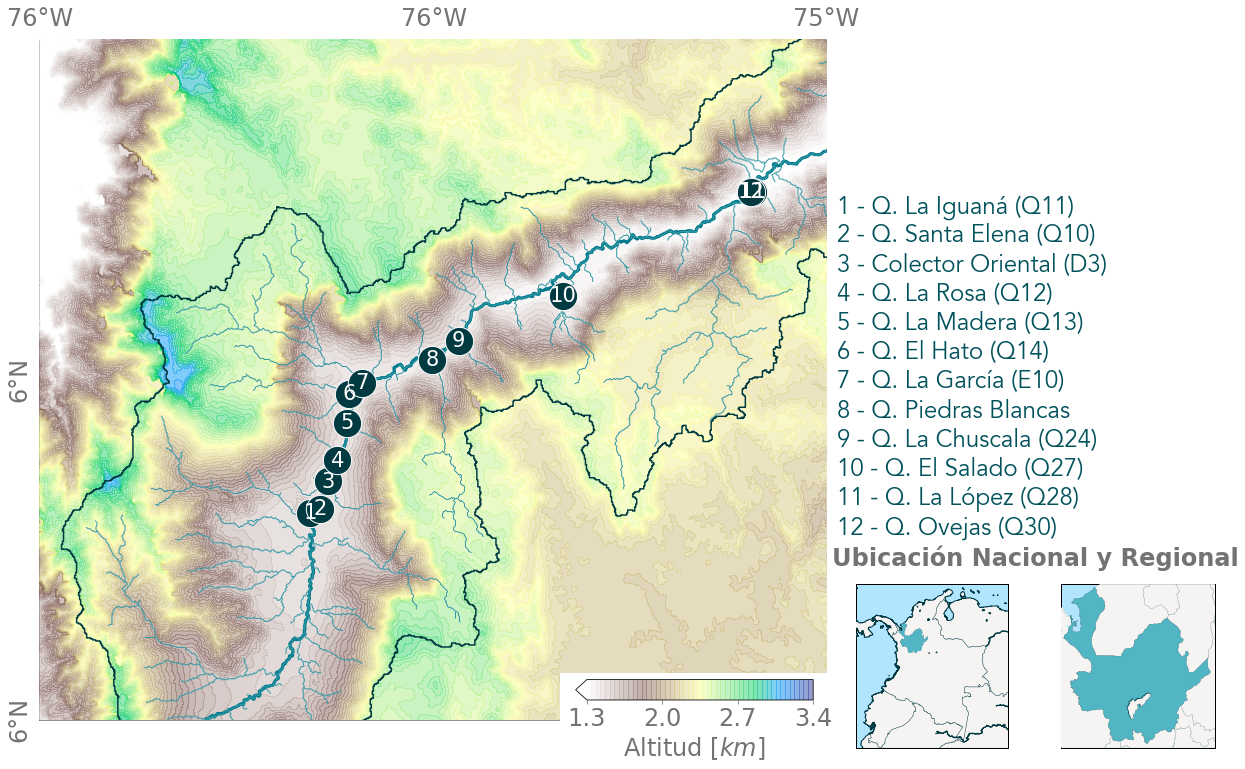

In [93]:
point = df_informacion.loc[dfe.drop(2)['id_estacion_asociada'].values].sort_values(by='Latitud')
self.Plot_Mapa2(add_scatter=[point['Longitud'].values,point['Latitud'].values],\
                #title =nombre_salida,Logo='SIATA2.png',\
                Drainage='/media/nicolas/maso/Mario/shapes/nets/Puente_Gabino_1061/Puente_Gabino_1061',\
                add_stations=map(lambda x:x.decode('utf-8'),point['Nombre'].values),\
                georef=[6.52,6.15,-75.725,(-75.725+0.43)],clim=[1300,3400],fontsize=24,\
                Basin='/media/nicolas/maso/Mario/shapes/basins/Puente_Gabino_1061/Puente_Gabino_1061',
                decimales=33)

self.m.readshapefile('/media/nicolas/maso/Mario/shapes/streams/169/169','drenaje',
                     color=self.colores_siata[-3],
                     linewidth=3.0,zorder=5)
plt.savefig('../figures/mapa_ensayo.png',format='png',bbox_inches='tight')


In [ ]:
point = df_informacion.loc[dfe.drop(2)['id_estacion_asociada'].values].sort_values(by='Latitud')
self.Plot_Mapa2(add_scatter=[point['Longitud'].values,point['Latitud'].values],\
                #title =nombre_salida,Logo='SIATA2.png',\
                Drainage='/media/nicolas/maso/Mario/shapes/nets/Puente_Gabino_1061/Puente_Gabino_1061',\
                add_stations=map(lambda x:x.decode('utf-8'),point['Nombre'].values),\
                georef=[6.52,6.15,-75.725,(-75.725+0.43)],clim=[1300,3400],fontsize=24,\
                Basin='/media/nicolas/maso/Mario/shapes/basins/Puente_Gabino_1061/Puente_Gabino_1061',
                decimales=33)

self.m.readshapefile('/media/nicolas/maso/Mario/shapes/streams/169/169','drenaje',
                     color=self.colores_siata[-3],
                     linewidth=3.0,zorder=5)

plt.savefig('../figures/mapa_ensayo.pdf',format='pdf',bbox_inches='tight')


In [13]:
cd ../scripts/

In [1]:
import matplotlib
matplotlib.use('Template')
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm
import matplotlib.gridspec as grid
from matplotlib.patches import Rectangle
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from matplotlib.colors import LightSource
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import locale
import scipy as sp
from scipy import stats as st
import glob as gb
from netCDF4 import Dataset
from osgeo import gdal, osr  
from osgeo.gdalconst import *                                       # shell utility module to work with os
import os, sys, time  
from matplotlib.mlab import griddata
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
from mpl_toolkits.mplot3d import axes3d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from dateutil.relativedelta import relativedelta
import MySQLdb
import psycopg2
import pickle
#from windrose import WindroseAxes
#Reportlab
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, landscape, inch
from reportlab.lib.enums import TA_JUSTIFY
from reportlab.platypus import Image, Paragraph, SimpleDocTemplate, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.pdfgen import canvas
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from StringIO import StringIO
import scipy.ndimage
from reportlab.lib.enums import TA_JUSTIFY
from pyPdf import PdfFileWriter, PdfFileReader
os.system('ln -s /media/nicolas/Home/Jupyter/MarioLoco/Tools/PDFImageSIATA.py %s' %os.getcwd())
from PDFImageSIATA import PdfImageSIATA
from pyPdf import PdfFileWriter, PdfFileReader

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
#  reportlab.py

locale.setlocale(locale.LC_TIME, ('es_co','utf-8'))

reload (sys)
sys.setdefaultencoding('utf8')




imgTemp = StringIO()
imgDoc  = canvas.Canvas(imgTemp)

imagenPDF = PdfImageSIATA ('niveles.pdf' , width = 540, height = 816)
imagenPDF.drawOn (imgDoc, 840,0)

#imagenPDF = PdfImageSIATA ('Figuras/Mapa_ICA_PM25.pdf', width = 750, height = 1000)
#imagenPDF.drawOn (imgDoc, 952,150)

#-----------------------------
# Agregar texto

#~ imgDoc.setFillColorRGB(1, 1, 1)
#~ imgDoc.setFont("AvenirHeavy", 30)
#~ imgDoc.drawString(680,1175,'%s - %s' %(self.Contaminante.index[0].strftime('%d/%m/%Y'),self.Contaminante.index[-1].strftime('%d/%m/%Y')))
#------------------------------
#~ imagenPDF = PdfImageSIATA (,width = 140, height = 140)
#~ imagenPDF.drawOn (imgDoc, 475,5)

#~ imgDoc.setFillColorRGB(0.45, 0.45, 0.45)
#~ imgDoc.drawString(505,150,'Conventions')
#~ imgDoc.drawString(488,168,'Winds Flow From')
#~ if type(self.Hourly) != type(None): 
	#~ imgDoc.setFont("AvenirHeavy", 18)
	#~ imgDoc.drawString(380,80,'Hour %s' %self.Hourly)

#~ # Plantilla
imgDoc.save()
page	= PdfFileReader(file("ensayo.pdf" ,"rb")).getPage(0)
overlay = PdfFileReader(StringIO(imgTemp.getvalue())).getPage(0)
page.mergePage(overlay)

#~ #Save the result
output = PdfFileWriter()
output.addPage(page)
#~ output.addPage(page_1)
output.write(file("ejemplomapa.pdf" ,"w"))
#os.system('scp Figuras/Mapa_ICA_test.pdf jhernandezv@siata.gov.co:/var/www/jhernandezv/' )
#578-295
#195 × 295 mm


In [ ]:
IFrame('ejemplomapa.pdf', width=1000, height=1000)

In [13]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import datetime
import os,sys
import string
import matplotlib.patches as patche
from mpl_toolkits.basemap import Basemap
import gdal
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from matplotlib import colors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import MySQLdb
from wmf import wmf
from mpl_toolkits.basemap import Basemap
import pylab as pl
import matplotlib.gridspec as gridspec
from scipy import spatial
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
import codecs
import xlsxwriter

In [14]:
df = pd.read_csv('niveles.csv',index_col=0)

In [21]:
df.index

Int64Index([169, 183, 109, 181, 104, 108,  94,  90, 101,  92, 166, 173,  93,
            116,  96, 150, 134, 155, 128],
           dtype='int64', name=u'codigo')

Colombia
Antioquia


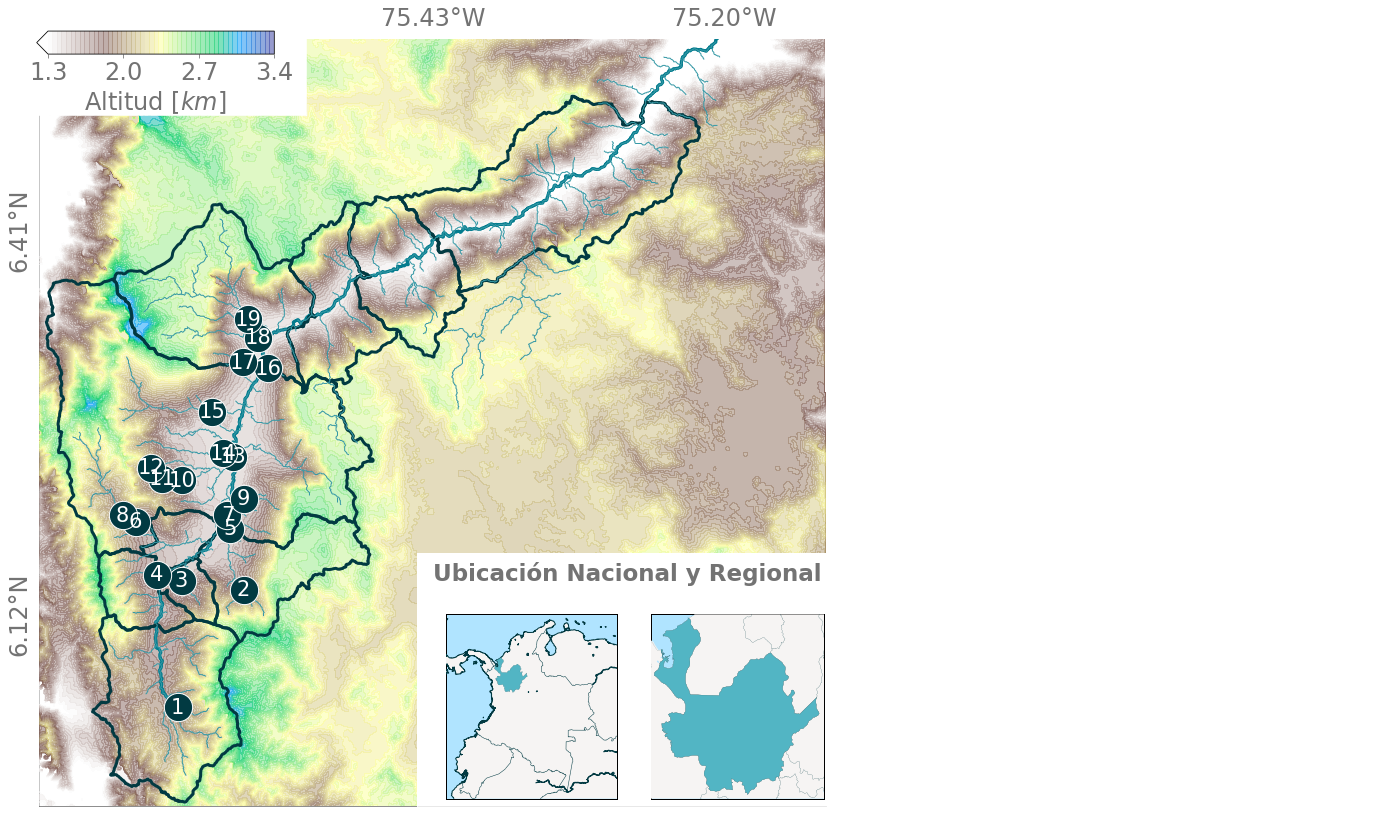

In [15]:
point = df
Plot_Mapa2(self,add_scatter=[point['longitud'].values,point['latitud'].values],\
                Drainage='/media/nicolas/maso/Mario/shapes/nets/Puente_Gabino_1061/Puente_Gabino_1061',\
                #Logo='../../Aforos/scripts/figuras/JU26to30.png',\
                add_stations=map(lambda x:x.decode('utf-8'),point['nombre'].values),\
                georef=[6.556,5.975,-75.725,-75.1255],clim=[1300,3400],fontsize=24,\
                decimales=4,\
                #Basin='/media/nicolas/maso/Mario/shapes/basins/Puente_Gabino_1061/Puente_Gabino_1061',\
                textcolor='w')

self.m.readshapefile('/media/nicolas/maso/Mario/shapes/streams/169/169','drenaje',
                     color=self.colores_siata[-3],
                     linewidth=3.0,zorder=5)
self.m.readshapefile('/media/nicolas/maso/Mario/shapes/AreaMetropolitana','area',
                     color=self.colores_siata[-1],
                     linewidth=3.0,zorder=5)

plt.savefig('ensayo.pdf',format='pdf',bbox_inches='tight')


In [ ]:
self.Setcolor(self.m.drawparallels(np.linspace(np.round(self.georef[1],decimals=decimales),
                                               np.round(self.georef[0],decimals=decimales),3),labels=[1,0,0,0],fmt=coord_format,color=(0.45, 0.45, 0.45),fontsize=self.fontsize,zorder=1,ax=self.ax[0],alpha=1,rotation='vertical',linewidth=0) ,(0.45, 0.45, 0.45) )
self.Setcolor(self.m.drawmeridians(np.linspace(np.round(self.georef[2],decimals=decimales),np.round(self.georef[3],decimals=decimales),3),labels=[0,0,1,0], fmt=coord_format,color=(0.45, 0.45, 0.45),fontsize=self.fontsize,zorder=2,ax=self.ax[0],alpha=1,linewidth=0),(0.45, 0.45, 0.45))
        

In [129]:
6.556+(6.2655 - 6.556)/2

6.41075

In [144]:
75.2775-(75.2775-75.13)/2

75.20375

In [141]:
75.425+(-75.425+75.13)/2

75.2775

In [125]:
np.linspace(np.round(self.georef[1],decimals=3),np.round(self.georef[0],decimals=3),3)

array([ 5.975 ,  6.2655,  6.556 ])

In [136]:
decimales=2
np.linspace(np.round(self.georef[2],decimals=decimales),np.round(self.georef[3],decimals=decimales),3)

array([-75.72 , -75.425, -75.13 ])

In [9]:
def Plot_Mapa2(self,*args,**kwargs):
        '''Función para graficar mapas, tomado de módulo Air.py de jhernandezv@siata.gov.co'''
        prop_1 = fm.FontProperties(fname='../Tools/AvenirLTStd-Book.ttf',)
        self.figsize	= kwargs.get('figsize',11)
        self.fontsize	= kwargs.get('fontsize',24)
        self.textsave	= kwargs.get('textsave',None)
        self.path 		= kwargs.get('path','../redrio_salida/')
        textcolor = kwargs.get('textcolor',(0.007,0.32,0.36))
        decimales = kwargs.get('decimales',1)
        coord_format = kwargs.get('coord_format',"%.2f")
        self.Read_DEM(path=kwargs['DEM'],ajust=False) if 'DEM' in kwargs.keys() else self.Read_DEM()
        self.georef		= kwargs.get('georef',[self.DEM.index[0]+(self.DEM.index[0]-self.DEM.index[-1])*.03,self.DEM.index[-1]-(self.DEM.index[0]-self.DEM.index[-1])*.03,self.DEM.columns[0]+(self.DEM.columns[0]-self.DEM.columns[-1])*.03,self.DEM.columns[-1]-(self.DEM.columns[0]-self.DEM.columns[-1])*.03])
        self.figsize = (self.figsize,self.figsize*(self.georef[0]-self.georef[1])/(self.georef[3]-self.georef[2]))
        plt.close('all')
        self.fig 		= plt.figure(figsize=self.figsize,facecolor='w',edgecolor='w')
        self.ax			= {}
        self.ax[0]		= self.fig.add_axes((0.00,0.00,1,1))		#Relieve
        self.ax[1]		= self.fig.add_axes((1.01,0.22,0.67,0.62))
        self.ax[1].patch.set_visible(False)
        if 'Logo' in kwargs.keys():	
            self.logo 		= plt.imread(kwargs['Logo'])
            self.logodim	= [self.logo.shape[1]/100./self.figsize[0]* (.7/(self.logo.shape[0]/100./self.figsize[1])),  .7]
            self.ax[2]		= self.fig.add_axes((1 +(.46-self.logodim[0])*.5 if(.46-self.logodim[0])>0 else 1 ,1-self.logodim[1],self.logodim[0],self.logodim[1]))
            self.ax[2].imshow(self.logo)
        #Mapas
        self.ax[7] = self.fig.add_axes((0.48,0.00,0.52,0.33))
        self.ax[4]		= self.fig.add_axes((1.01-0.505,0.01,0.24,0.24))
        self.ax[5]		= self.fig.add_axes((1.27-0.505,0.01,0.24,0.24))
        # Colorbar
        self.ax[3]		= self.fig.add_axes((0.0,0.95-0.05,0.34,0.11))
        self.ax[6]		= self.fig.add_axes((0.0,0.95+0.03,0.3,0.03))

        for i in self.ax.keys():
            plt.setp(self.ax[i].spines.values(), color='w')
            if i > 0: self.ax[i].tick_params(labelleft='off',labelbottom='off',right='off',left='off',bottom='off',top='off',which='both', colors=(0.45, 0.45, 0.45))
        self.ax[0].tick_params(labelleft='on',labelbottom='on',right='off',left='on',bottom='on',top='off',which='both', colors=(0.45, 0.45, 0.45))
        self.ax[0].spines['bottom'].set_color((0.45, 0.45, 0.45))
        self.ax[0].spines['left'].set_color((0.45, 0.45, 0.45))

        self.m 			= Basemap(ax=self.ax[0],projection='merc',llcrnrlat=self.georef[1],urcrnrlat=self.georef[0],llcrnrlon=self.georef[2],urcrnrlon=self.georef[3],resolution='h') 
        self.Setcolor(self.m.drawparallels([6.12025,6.41075],labels=[1,0,0,0],fmt=coord_format,color=(0.45, 0.45, 0.45),fontsize=self.fontsize,zorder=1,ax=self.ax[0],alpha=1,rotation='vertical',linewidth=0) ,(0.45, 0.45, 0.45) )
        self.Setcolor(self.m.drawmeridians([-75.425,-75.20375],labels=[0,0,1,0], fmt=coord_format,color=(0.45, 0.45, 0.45),fontsize=self.fontsize,zorder=2,ax=self.ax[0],alpha=1,linewidth=0),(0.45, 0.45, 0.45))
        ##############################################################################
        #~ #DEM
        if 'Municipios' in kwargs.keys(): 
            self.m.readshapefile('../Tools/MunicipiosAntioquia','Municipios',linewidth=.5,color=(0.0078,0.227,0.26),zorder=1)
            self.patches = []
            for info,shape in zip(self.m.Municipios_info,self.m.Municipios):
                if info['nom_munici'] in kwargs['Municipios']:	self.patches.append( Polygon(np.array(shape),True))
            self.ax[0].add_collection(PatchCollection(self.patches,  facecolor= [ 0.96470588,  0.95686275,  0.95294118], edgecolor=(0.0078,0.227,0.26), linewidths=1, zorder=2)) 

        self.X,self.Y		= np.meshgrid(self.DEM.columns.values,self.DEM.index.values)
        self.Xm,self.Ym		= self.m(self.X,self.Y)
        #~ #norm=mpl.colors.Normalize(700,3100)
        self.cs 			= self.m.contourf(self.Xm, self.Ym, self.DEM.values, levels=np.linspace(self.DEM.min().min(),self.DEM.max().max(),50) if 'clim' not in kwargs.keys() else np.linspace(kwargs['clim'][0],kwargs['clim'][1],50), cmap=plt.cm.terrain_r,alpha=.5,extend='min',zorder=3)
        self.cs.cmap.set_over('b')
        self.cs.cmap.set_under('w')

        # Colorbar
        cbar=plt.colorbar(self.cs,cax=self.ax[6],orientation='horizontal',format='%.f')
        cbar.set_label(r"Altitud $[km]$",fontsize=self.fontsize,color=(0.45, 0.45, 0.45))
        cbar.set_ticks(np.linspace(self.DEM.min().min(),self.DEM.max().max(),4)  if 'clim' not in kwargs.keys() else np.linspace(kwargs['clim'][0],kwargs['clim'][1],4))
        cbar.set_ticklabels(np.round(np.linspace(self.DEM.min().min(),self.DEM.max().max(),4)/1000.,decimals=1) if 'clim' not in kwargs.keys() else np.round(np.linspace(kwargs['clim'][0],kwargs['clim'][1],4)/1000.,decimals=1))
        cbar.ax.tick_params(labelsize=self.fontsize,colors=(0.45, 0.45, 0.45))
        zorder = 0
        if 'Basin' in kwargs.keys():
            if type(kwargs['Basin']) == type('str'):
                self.m.readshapefile(kwargs['Basin'],'Area',linewidth=1.5,color=(0.0078,0.227,0.26),zorder=4)
            else: 

                for basin in kwargs['Basin']:
                    self.m.readshapefile(basin,'Area',linewidth=1,color=(0.0078,0.227,0.26),zorder=4 + zorder)
                    zorder +=1


        if 'add_shape' in kwargs.keys():
            self.m.readshapefile(kwargs['add_shape'],'add_shape',linewidth=.5,color=(0.0078,0.227,0.26),zorder=5 + zorder)
            self.patches = []
            for info,shape in zip(self.m.add_shape_info,self.m.add_shape):
                self.patches.append( Polygon(np.array(shape),True))
            self.ax[0].add_collection(PatchCollection(self.patches,  facecolor= [ 0.7372549 ,  0.99215686,  0.1372549 ], edgecolor=(0.0078,0.227,0.26), linewidths=.5, zorder=6 + zorder)) #[ 0.96470588,  0.95686275,  0.95294118]

        if 'Drainage' in kwargs.keys(): 
            self.m.readshapefile(kwargs['Drainage'],'Drainage',linewidth=1,color=[0.21, 0.6, 0.65],zorder=7 + zorder)

        if 'add_scatter' in kwargs.keys(): 
            self.X,self.Y		= self.m(kwargs['add_scatter'][0] ,kwargs['add_scatter'][1])
            self.m.scatter(self.X,self.Y,s=500 + (300 if 'add_stations' in kwargs.keys() else 0),facecolor=(0.0078,0.227,0.26),edgecolor='w',zorder=8+ zorder)

        if 'add_stations' in kwargs.keys():
            c = 0
            for i in range(len(self.X)):
                self.ax[0].text(self.X[i],self.Y[i],'%d' %(i+1), ha='center',va='center',
                    fontsize=self.fontsize-3,color='w',zorder=9+zorder) #,bbox={'facecolor':(0.32,0.71,0.77), 'alpha':0.2, 'pad':2,'edgecolor':'w'})

                self.ax[1].text(0,.86-.76/(len(self.X)-1)*i,'%d - %s'%(i+1,kwargs['add_stations'][i] ), ha='left', va='center',color=textcolor,fontsize=self.fontsize,fontproperties=prop_1)
                #~ self.ax[0].text(self.m(-75.1,6.472-c)[0],self.m(-75.1,6.472-c)[1],'%d - %s'%(i+1,kwargs['add_stations'][i] ), ha='left', va='center',color=(0.007,0.32,0.36),fontsize=self.fontsize,fontproperties=prop_1)
                c += 0.0385
                zorder+=1

        if kwargs.get('legend',False):
            self.legend = {}
            plt.rcParams['legend.numpoints']=1 
            #~ iqr     = plt.Line2D((0,1),(0,0),color=(0.875,0.875,0.875),marker='s',linestyle='',fillstyle='full',markeredgecolor='w')#(0.007,0.32,0.36))
            if 'Drainage' in kwargs.keys():		self.legend['Red de Drenaje']		= plt.Line2D((0,1),(0,0),color=(0.0078,0.227,0.26),ls='-',lw=1)
            if 'Basin' in kwargs.keys():		self.legend['Cuenca Hidrográfica']	= plt.Line2D((0,1),(0,0),color=(0.0078,0.227,0.26),ls='-',lw=4)
            if 'add_scatter' in kwargs.keys():	self.legend['Estación IDEAM']		= plt.Line2D((0,1),(0,0),ls='',marker='o',markersize=20,mfc=(0.0078,0.227,0.26),mec='w',lw=1,fillstyle='full')
            if 'add_shape' in kwargs.keys():	self.legend[kwargs.get('add_shape_name','Cabecera Urbana')]	= plt.Line2D((0,1),(0,0),ls='',marker='s',markersize=20,mfc=[ 0.7372549 ,  0.99215686,  0.1372549 ],mec=(0.0078,0.227,0.26),lw=.5,fillstyle='full')
            if 'Municipios' in kwargs.keys():	
                for i in range(len(kwargs['Municipios'])):	self.legend[kwargs['Municipios'][i]]	= plt.Line2D((0,1),(0,0),ls='',marker='s',markersize=20,mfc=[ 0.96470588,  0.95686275,  0.95294118], mec=(0.0078,0.227,0.26),lw=1,fillstyle='full')

            self.leg		= self.ax[0].legend(self.legend.values(),self.legend.keys(),bbox_to_anchor=(1,.54),fontsize=self.fontsize-2, loc='upper left',title='Convenciones',labelspacing=.8)
            self.leg.get_frame().set_edgecolor('w')
            for text in self.leg.get_texts(): plt.setp(text, color = (0.45, 0.45, 0.45))
            #~ self.leg.get_title().set_fontsize(self.fontsize)
            plt.setp(self.leg.get_title(),fontsize=self.fontsize,weight='bold',color=(0.45, 0.45, 0.45))
        #####################################################################
        #~ # Texto

        if 'title' in kwargs.keys():
            self.ax[1].text(.5,.95,kwargs['title'],ha='center',va='center',fontsize=self.fontsize+2,color=(0.45, 0.45, 0.45),weight='bold')
        if 'add_text1' in kwargs.keys():
            self.ax[1].text(.0,.851,kwargs['add_text1'][0],ha='left',va='bottom',fontsize=self.fontsize-2,color=(0.45, 0.45, 0.45))
            self.ax[1].text(.0,.849,kwargs['add_text1'][1],ha='left',va='top',fontsize=self.fontsize-2,color=(0.45, 0.45, 0.45))
        if 'add_text2' in kwargs.keys():
            self.ax[1].text(.0,.751,kwargs['add_text2'][0],ha='left',va='bottom',fontsize=self.fontsize-2,color=(0.45, 0.45, 0.45))
            self.ax[1].text(.0,.749,kwargs['add_text2'][1],ha='left',va='top',fontsize=self.fontsize-2,color=(0.45, 0.45, 0.45))
        if 'add_text3' in kwargs.keys():
            self.ax[1].text(.0,.651,kwargs['add_text3'][0],ha='left',va='bottom',fontsize=self.fontsize-2,color=(0.45, 0.45, 0.45))
            self.ax[1].text(.0,.649,kwargs['add_text3'][1],ha='left',va='top',fontsize=self.fontsize-2,color=(0.45, 0.45, 0.45))
        if 'add_text4' in kwargs.keys():
            self.ax[1].text(.0,.551,kwargs['add_text4'][0],ha='left',va='bottom',fontsize=self.fontsize-2,color=(0.45, 0.45, 0.45))
            self.ax[1].text(.0,.549,kwargs['add_text4'][1],ha='left',va='top',fontsize=self.fontsize-2,color=(0.45, 0.45, 0.45))
        self.ax[7].text(.51,.87,u'Ubicación Nacional y Regional',ha='center',va='bottom',fontsize=self.fontsize-1,color=(0.45, 0.45, 0.45),weight='bold')
        ################################################################################
        #colores
        #~  Oceano			[ 0.71372549,  0.87058824,  0.88235294];
        #~ Antioquia		[ 0.64705882,  0.97254902,  0.70980392];[ 0.3372549 ,  0.91764706,  0.75294118] ;[ 0.44705882,  0.94901961,  0.68235294]
        #~ Colombia			[ 0.91372549,  0.87843137,  0.87843137]; 
        #~ Valle			[ 0.4745098 ,  0.52941176,  0.80784314];[ 0.36078431,  0.6745098 ,  0.94509804]
        print 'Colombia'
        # Colombia
        self.mc 		= Basemap(ax=self.ax[4],projection='merc',llcrnrlat=-5,urcrnrlat=13,llcrnrlon=-81.86,urcrnrlon=-65,resolution='h')
        self.mc.drawmapboundary(fill_color=[ 0.69019608,  0.89411765,  1.        ],zorder=1)
        self.mc.fillcontinents(color=[ 0.96470588,  0.95686275,  0.95294118],lake_color=[ 0.69019608,  0.89411765,  1.        ],zorder=2)
        self.mc.drawcountries(color=(0.0078,0.227,0.26),zorder=3)
        self.mc.drawcoastlines(color=(0.0078,0.227,0.26),zorder=4)
        self.mc.readshapefile('../Tools/Antioquia','Antioquia',linewidth=0.1,color=(0.0078,0.227,0.26),zorder=5)
        self.patches = []
        for info,shape in zip(self.mc.Antioquia_info,self.mc.Antioquia):
            self.patches.append( Polygon(np.array(shape),True))

        self.ax[4].add_collection(PatchCollection(self.patches, facecolor=[0.32, 0.71, 0.77], edgecolor=(0.0078,0.227,0.26), linewidths=.1, zorder=6))

        ###########################################################################
        print 'Antioquia'
        # Antioquia
        self.ma 		= Basemap(ax=self.ax[5],projection='merc',llcrnrlat=5.35,urcrnrlat=8.95,llcrnrlon=-77.18,urcrnrlon=-73.76,resolution='f')
        self.ma.drawmapboundary(fill_color=[ 0.69019608,  0.89411765,  1.        ],zorder=1)
        self.ma.fillcontinents(color=[ 0.96470588,  0.95686275,  0.95294118],lake_color=[ 0.69019608,  0.89411765,  1.        ],zorder=2)

        self.ma.readshapefile('../Tools/Departamentos','Departamentos',linewidth=0.1,color=(0.0078,0.227,0.26),zorder=3)
        self.ma.readshapefile('../Tools/Antioquia','Antioquia',linewidth=0.1,color=(0.0078,0.227,0.26),zorder=4)
        self.patches = []
        for info,shape in zip(self.ma.Antioquia_info,self.ma.Antioquia):
            self.patches.append( Polygon(np.array(shape),True))

        self.ax[5].add_collection(PatchCollection(self.patches, facecolor=[0.32, 0.71, 0.77], edgecolor=(0.0078,0.227,0.26), linewidths=.1,zorder=5 ))

        if 'Basin' in kwargs.keys():
            self.ma.readshapefile(kwargs['Basin'],'Area',linewidth=0.5,color=(0.0078,0.227,0.26),zorder=6)
            self.patches = []
            for info,shape in zip(self.ma.Area_info,self.ma.Area):
                self.patches.append( Polygon(np.array(shape),True))

            self.ax[5].add_collection(PatchCollection(self.patches, facecolor= [ 0.96470588,  0.95686275,  0.95294118], edgecolor=(0.0078,0.227,0.26), linewidths=.1,zorder=7 )) #fc=[0.21,0.60,0.65]

        if 'Arrow' in kwargs.keys():
            self.ax[5].annotate('' , xy=self.ma(kwargs['Arrow'][0],kwargs['Arrow'][1]), xytext=self.ma(-75.47,7.15),va='center',ha='center',fontsize=self.fontsize,weight='bold',color=(0.0078,0.227,0.26),arrowprops=dict(facecolor=(0.0078,0.227,0.26),edgecolor=(0.0078,0.227,0.26), shrink=0.00,width=.5,headwidth=5),zorder=8) #bbox=dict(facecolor=colors[0], edgecolor='none', boxstyle='round',alpha=.2))
        plt.savefig('%s.pdf' %kwargs.get('textsave','mapa'), bbox_inches='tight')  